In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_proj/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_PH = df[(df['job_country'] == 'Philippines') & (df['job_title_short'] == 'Data Analyst')]

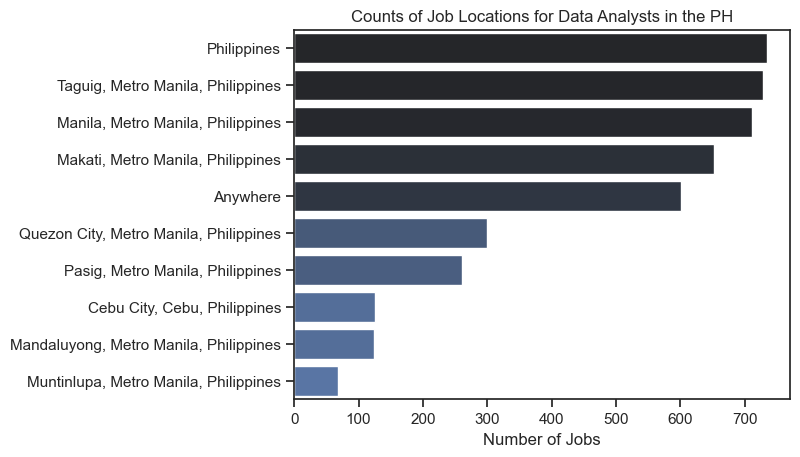

In [12]:
df_plot = df_DA_PH['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Counts of Job Locations for Data Analysts in the PH')
plt.show()

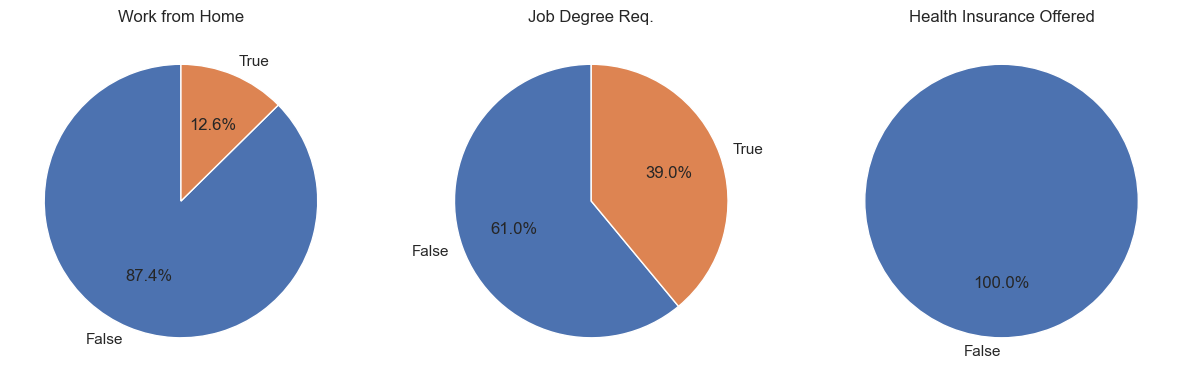

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_PH[column].value_counts()
    labels = value_counts.index.astype(str)  # Convert labels to string
    ax[i].pie(value_counts, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)

plt.show()

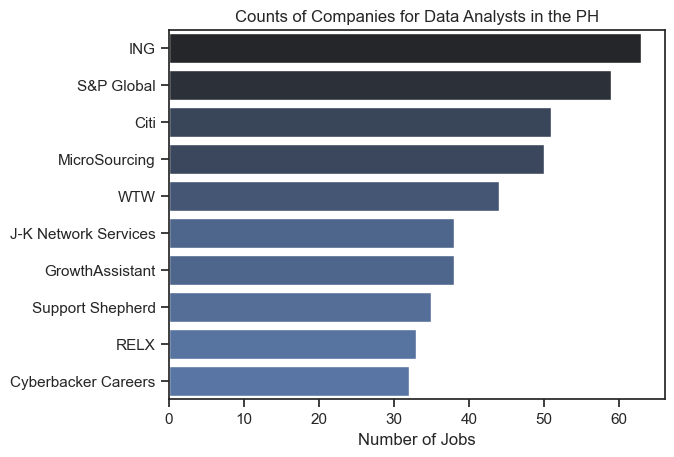

In [21]:
df_plot = df_DA_PH['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Counts of Companies for Data Analysts in the PH')
plt.show()